In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

import my_module

pd.set_option("display.max_rows", 20)
pd.set_option("display.max_columns", None)

## acc

In [2]:
df_acc, df_care = my_module.read_data(8)

In [75]:
print(df_acc.shape, df_acc.isnull().sum(), df_acc.duplicated().sum())
df_acc = df_acc.drop_duplicates()
print(df_acc.shape)
df_acc.head()

(5112531, 5) subject_id    0
datetime      0
x             0
y             0
z             0
dtype: int64 4675647
(436884, 5)


,subject_id,datetime,x,y,z
0,8,2018-06-03T07:55:29.965+0900,2.375,-11.837,-0.664
1,8,2018-06-03T08:29:26.250+0900,2.375,3.486,8.968
2,8,2018-06-03T09:22:56.925+0900,2.375,4.405,8.436
3,8,2018-06-02T13:01:17.956+0900,2.375,4.367,8.849
4,8,2018-06-03T09:28:48.797+0900,2.375,4.060,8.707


In [69]:
df_acc = df_acc.sort_values(["datetime"])

In [70]:
df_acc = my_module.convert_datetime(df_acc, ["datetime"])
df_acc["passed_time"] = df_acc["datetime"] - df_acc["datetime"].iloc[0]

In [71]:
df.head()

,subject_id,datetime,x,y,z,passed_time
20333550,13,2018-04-05 18:59:27.350000+09:00,-0.612,-9.270,-0.097,0 days 00:00:00
17634451,13,2018-04-05 18:59:27.361000+09:00,-0.191,-9.308,-0.097,0 days 00:00:00.011000
20256753,13,2018-04-05 18:59:27.381000+09:00,-0.191,-9.308,-0.097,0 days 00:00:00.031000
1730222,13,2018-04-05 18:59:27.385000+09:00,0.038,-9.730,-0.100,0 days 00:00:00.035000
22945543,13,2018-04-05 18:59:27.388000+09:00,0.038,-9.730,-0.100,0 days 00:00:00.038000


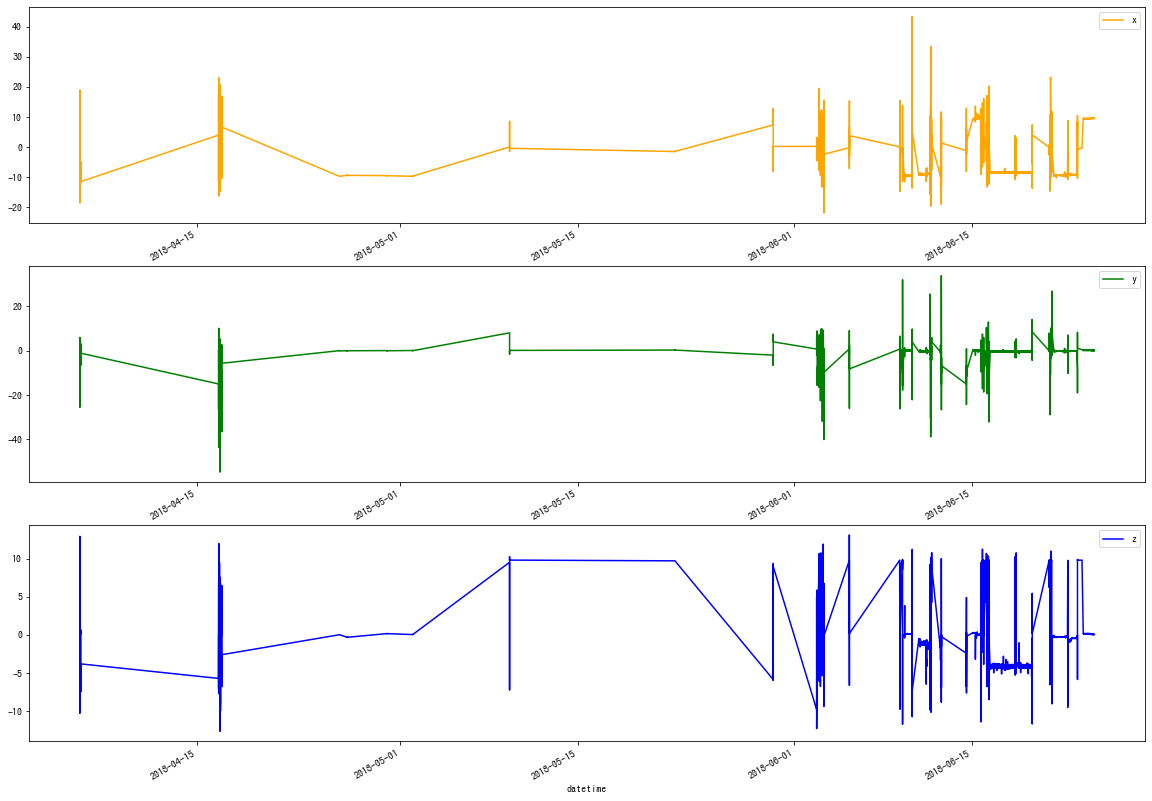

In [72]:
fig, axes = plt.subplots(3, 1, figsize=(20, 15))
colors = ["orange", "green", "blue"]
columns = ["x", "y", "z"]
for i in range(3):
    df_acc.plot(x="datetime", y=columns[i], ax=axes[i], color=colors[i]);

In [78]:
df_acc

,subject_id,datetime,x,y,z
0,8,2018-06-03T07:55:29.965+0900,2.375,-11.837,-0.664
1,8,2018-06-03T08:29:26.250+0900,2.375,3.486,8.968
2,8,2018-06-03T09:22:56.925+0900,2.375,4.405,8.436
3,8,2018-06-02T13:01:17.956+0900,2.375,4.367,8.849
4,8,2018-06-03T09:28:48.797+0900,2.375,4.060,8.707
...,...,...,...,...,...
5110129,8,2018-06-03T06:41:11.157+0900,1.762,-9.692,-0.092
5110130,8,2018-06-03T06:41:11.141+0900,1.762,-9.692,-0.092
5110132,8,2018-06-02T07:24:38.535+0900,1.762,-9.692,-0.038
5110134,8,2018-06-02T13:19:25.354+0900,1.762,-9.692,0.256


In [86]:
df_care[df_care[["start", "finish"]].duplicated()]

,id,user_id,activity_type_id,activity_type,target_id,activity2user_id,start,finish,year-month-date-hour
1,1653,8,4,排泄,35,17778,2018-02-23 23:58:02+09:00,2018-02-23 23:58:07+09:00,2018-02-23-23.0
2,1653,8,4,排泄,36,17779,2018-02-23 23:58:02+09:00,2018-02-23 23:58:07+09:00,2018-02-23-23.0
4,1654,8,4,排泄,41,17781,2018-02-23 23:59:37+09:00,2018-02-23 23:59:39+09:00,2018-02-23-23.0
5,1654,8,4,排泄,43,17783,2018-02-23 23:59:37+09:00,2018-02-23 23:59:39+09:00,2018-02-23-23.0
6,1654,8,4,排泄,44,17784,2018-02-23 23:59:37+09:00,2018-02-23 23:59:39+09:00,2018-02-23-23.0
...,...,...,...,...,...,...,...,...,...
3583,15976,8,7,活力朝礼・ラジオ体操,44,52144,2018-05-12 09:27:54+09:00,2018-05-12 09:29:34+09:00,2018-05-12-9.0
3584,15976,8,7,活力朝礼・ラジオ体操,45,52145,2018-05-12 09:27:54+09:00,2018-05-12 09:29:34+09:00,2018-05-12-9.0
3585,15976,8,7,活力朝礼・ラジオ体操,47,52147,2018-05-12 09:27:54+09:00,2018-05-12 09:29:34+09:00,2018-05-12-9.0
3586,15976,8,7,活力朝礼・ラジオ体操,52,52148,2018-05-12 09:27:54+09:00,2018-05-12 09:29:34+09:00,2018-05-12-9.0


In [92]:
df_care

,id,user_id,activity_type_id,activity_type,target_id,activity2user_id,start,finish,year-month-date-hour
0,1653,8,4,排泄,8,17777,2018-02-23 23:58:02+09:00,2018-02-23 23:58:07+09:00,2018-02-23-23.0
1,1653,8,4,排泄,35,17778,2018-02-23 23:58:02+09:00,2018-02-23 23:58:07+09:00,2018-02-23-23.0
2,1653,8,4,排泄,36,17779,2018-02-23 23:58:02+09:00,2018-02-23 23:58:07+09:00,2018-02-23-23.0
3,1654,8,4,排泄,40,17782,2018-02-23 23:59:37+09:00,2018-02-23 23:59:39+09:00,2018-02-23-23.0
4,1654,8,4,排泄,41,17781,2018-02-23 23:59:37+09:00,2018-02-23 23:59:39+09:00,2018-02-23-23.0
...,...,...,...,...,...,...,...,...,...
3627,20149,8,18,申し送り・ミーティング,8,60449,2018-05-19 13:01:42+09:00,2018-05-19 13:01:44+09:00,2018-05-19-13.0
3628,20414,8,18,申し送り・ミーティング,8,60912,2018-05-19 22:08:25+09:00,2018-05-19 22:08:34+09:00,2018-05-19-22.0
3629,20787,8,18,申し送り・ミーティング,8,61750,2018-05-20 13:01:09+09:00,2018-05-20 13:01:25+09:00,2018-05-20-13.0
3630,21045,8,18,申し送り・ミーティング,8,62211,2018-05-20 22:01:42+09:00,2018-05-20 22:01:55+09:00,2018-05-20-22.0


In [81]:
df_care = my_module.convert_datetime(df_care, ["start", "finish"])
df_acc = my_module.convert_datetime(df_acc, ["datetime"])
df_acc.sort_values(["datetime"]), df_care.sort_values([""])

In [7]:
df_all_acc, df_all_care = my_module.read_all_data()

NameError: name 'df_care_' is not defined

## train

In [2]:
df_acc, df_care = my_module.read_data(8)
df_care = my_module.convert_datetime(df_care, ["start", "finish"])

In [3]:
display(df_acc.head()), display(df_care.head());

,subject_id,datetime,x,y,z
0,8,2018-06-03T07:55:29.965+0900,2.375,-11.837,-0.664
1,8,2018-06-03T08:29:26.250+0900,2.375,3.486,8.968
2,8,2018-06-03T09:22:56.925+0900,2.375,4.405,8.436
3,8,2018-06-02T13:01:17.956+0900,2.375,4.367,8.849
4,8,2018-06-03T09:28:48.797+0900,2.375,4.060,8.707


,id,user_id,activity_type_id,activity_type,target_id,activity2user_id,start,finish,year-month-date-hour
0,1653,8,4,排泄,8,17777,2018-02-23 23:58:02+09:00,2018-02-23 23:58:07+09:00,2018-02-23-23.0
1,1653,8,4,排泄,35,17778,2018-02-23 23:58:02+09:00,2018-02-23 23:58:07+09:00,2018-02-23-23.0
2,1653,8,4,排泄,36,17779,2018-02-23 23:58:02+09:00,2018-02-23 23:58:07+09:00,2018-02-23-23.0
3,1654,8,4,排泄,40,17782,2018-02-23 23:59:37+09:00,2018-02-23 23:59:39+09:00,2018-02-23-23.0
4,1654,8,4,排泄,41,17781,2018-02-23 23:59:37+09:00,2018-02-23 23:59:39+09:00,2018-02-23-23.0


In [4]:
# drop
df_care = df_care.dropna()

In [5]:
df_care = my_module.add_timeLength_timeLengthSeconds(df_care)

In [6]:
df_care_group = df_care.groupby(["activity_type_id"])
df_care_group["time_length_seconds"].agg([max, min, np.mean, np.var, len])

,max,min,mean,var,len
activity_type_id,,,,,
1,687.0,1.0,272.050000,8.120225e+04,120
2,3600.0,-86314.0,-21.397603,8.184879e+06,918
3,99.0,1.0,9.714286,2.907104e+02,112
4,307.0,0.0,22.463030,2.086043e+03,825
5,202.0,1.0,28.794393,4.062750e+03,107
7,251.0,1.0,39.082353,6.283243e+03,85
8,51.0,1.0,8.937500,2.258669e+02,32
9,57.0,1.0,7.797297,1.741364e+02,74
10,160.0,1.0,47.714286,2.154125e+03,49


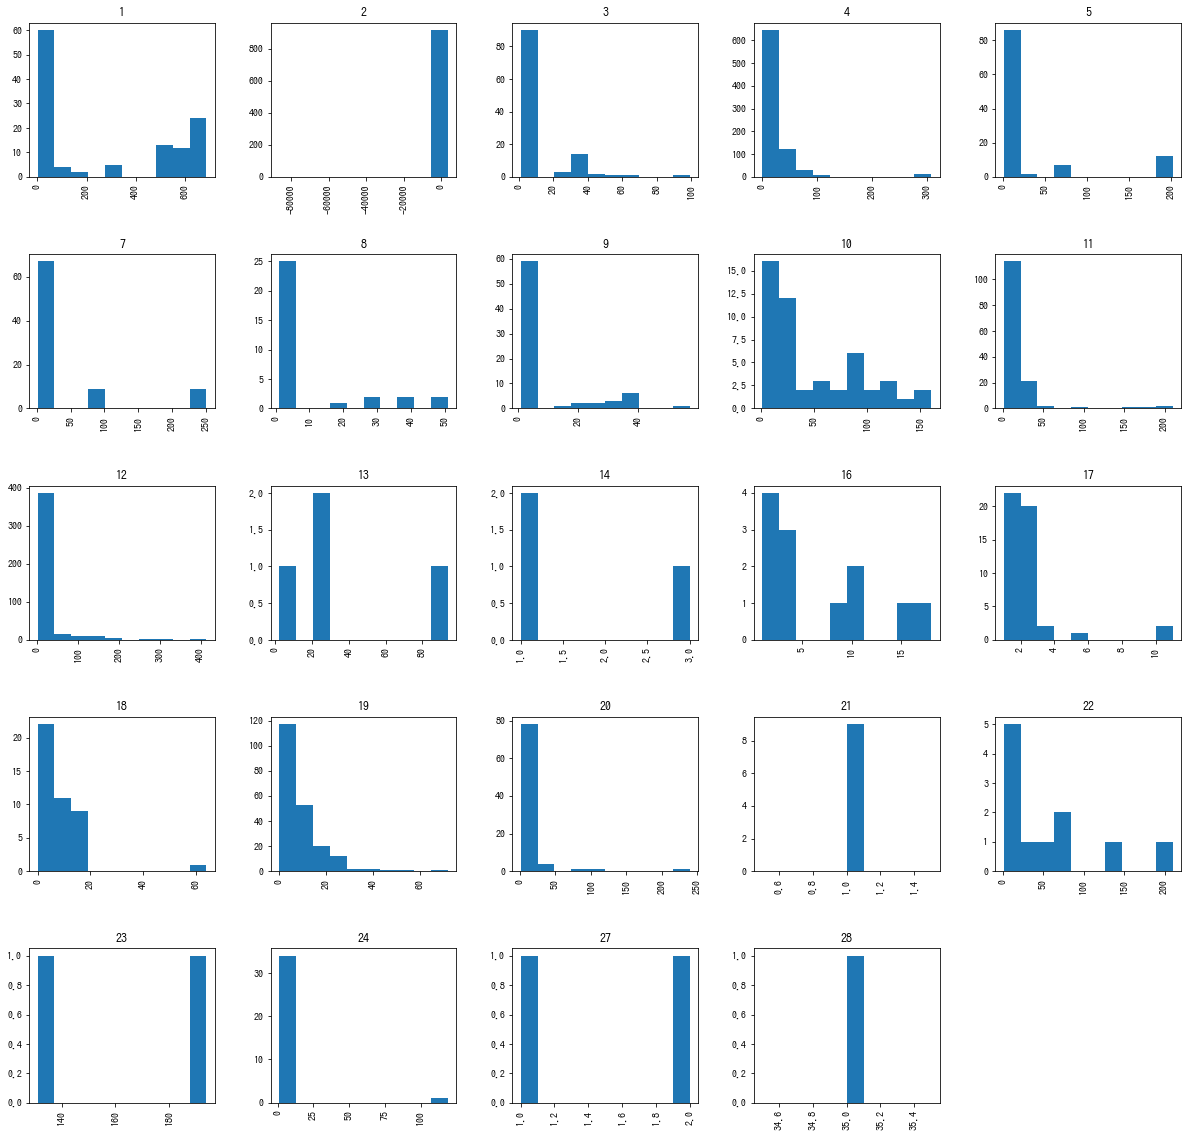

In [7]:
df_care.hist(column="time_length_seconds", by="activity_type_id", figsize=(20, 20));

## 全データ

In [8]:
from glob import glob
df = pd.DataFrame()
for path in glob("../data/Care Record Data/*"):
    tmp = pd.read_csv(path)
    print(tmp.shape)
    df = pd.concat([df, tmp])

(1029, 9)
(3373, 9)
(2186, 9)
(3632, 9)
(765, 9)


In [9]:
df.head()

,id,user_id,activity_type_id,activity_type,target_id,activity2user_id,start,finish,year-month-date-hour
0,4173,15,26,休憩,15,25397,2018-03-31 21:29:28+09:00,2018-03-31 22:02:45+09:00,2018-03-31-21.0
1,4410,15,26,休憩,15,26067,2018-04-03 21:49:23+09:00,2018-04-03 22:13:44+09:00,2018-04-03-21.0
2,6280,15,26,休憩,15,31067,2018-04-15 21:53:08+09:00,2018-04-15 22:14:46+09:00,2018-04-15-21.0
3,7928,15,26,休憩,15,34782,2018-04-21 21:34:30+09:00,2018-04-21 22:02:20+09:00,2018-04-21-21.0
4,12797,15,26,休憩,15,45514,2018-05-06 21:49:48+09:00,2018-05-06 22:08:50+09:00,2018-05-06-21.0


In [18]:
df.groupby(["user_id", "activity_type_id"])["activity_type_id"].agg([len])

len
user_id activity_type_id      
8       1                  132
        2                  989
        3                  136
        4                  875
        5                  114
        7                   85
        8                   32
        9                   74
        10                  49
        11                 163
        12                 432
        13                   4
        14                   3
        16                  12
        17                  78
        18                  45
        19                 221
        20                 105
        21                  10
        22                  12
        23                  15
        24                  43
        27                   2
        28                   1
13      1                   85
        2                  578
        3                    2
        4                  416
        5                   35
        7                   27
        8                    1
        9                   90
        10                 236
        11                  80
        12                 520
        13                  13
        14                  13
        15                   2
        16                  25
        17                   9
        18                   3
        19                  43
        20                   1
        23                   4
        24                   1
        25                   1
        27                   1
14      1                  126
        2                  650
        3                   14
        4                  485
        5                    1
        6                   11
        7                   25
        9                   49
        10                  48
        11                  58
        12                1760
        13                  17
        14                  14
        15                   1
        16                  80
        17                  26
        18                   2
        19                   4
        26                   1
        27                   1
15      1                   52
        2                  268
        3                    2
        4                   21
        5                    3
        7                   23
        9                   17
        10                   3
        11                  27
        12                 564
        13                   7
        14                   1
        15                   1
        16                  21
        18                   9
        19                   2
        26                   7
        28                   1
25      1                    2
        2                   38
        4                   33
        6                  245
        7                    2
        8                    8
        9                    9
        10                 100
        11                  10
        12                 137
        13                   4
        16                   9
        17                  15
        18                  43
        22                  22
        23                  24
        24                  30
        25                   6
        26                  26
        27                   1
        28                   1

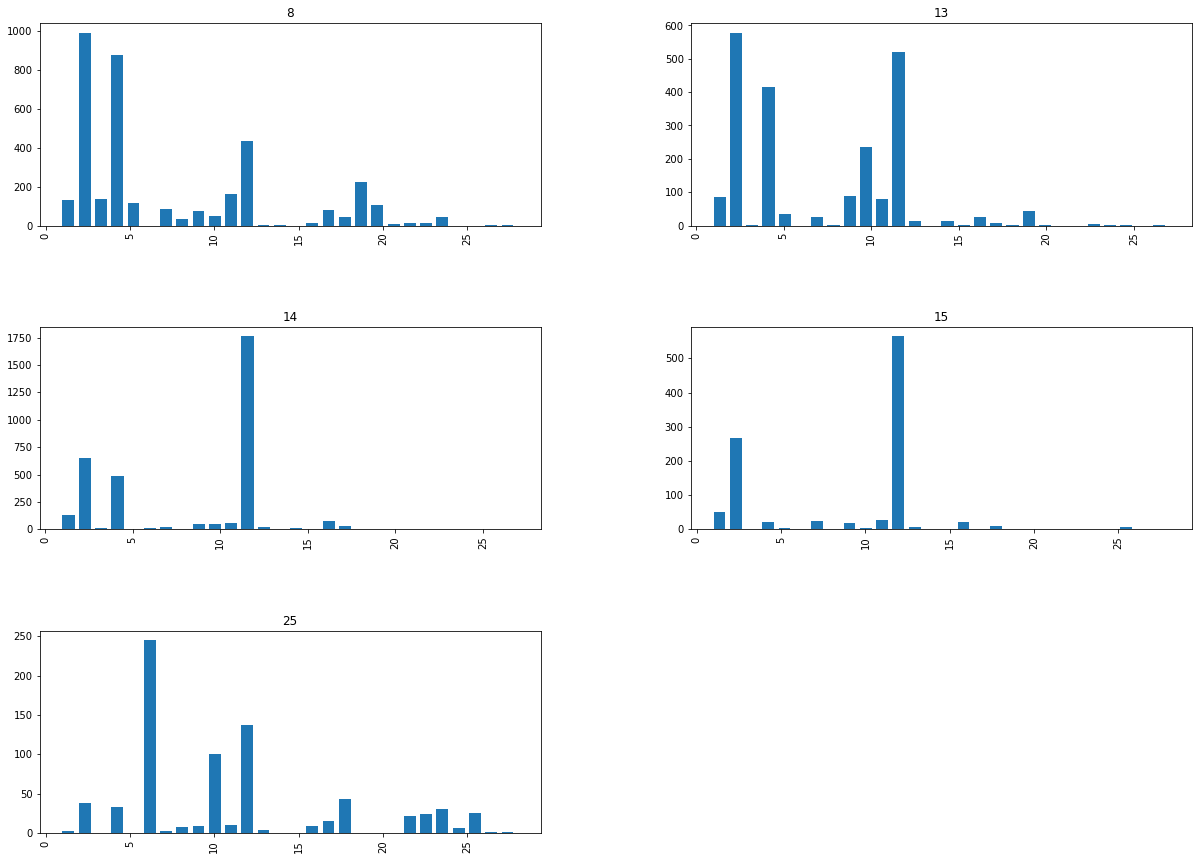

In [ ]:
df.hist(by='user_id', column='activity_type_id', figsize=(20, 15), bins=28, width=0.7);

In [20]:
df.groupby(["user_id", "activity_type_id"])["activity_type_id"].agg([len]).reset_index().pivot('user_id', 'activity_type_id','len').fillna(0)

activity_type_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8,132.0,989.0,136.0,875.0,114.0,0.0,85.0,32.0,74.0,49.0,163.0,432.0,4.0,3.0,0.0,12.0,78.0,45.0,221.0,105.0,10.0,12.0,15.0,43.0,0.0,0.0,2.0,1.0
13,85.0,578.0,2.0,416.0,35.0,0.0,27.0,1.0,90.0,236.0,80.0,520.0,13.0,13.0,2.0,25.0,9.0,3.0,43.0,1.0,0.0,0.0,4.0,1.0,1.0,0.0,1.0,0.0
14,126.0,650.0,14.0,485.0,1.0,11.0,25.0,0.0,49.0,48.0,58.0,1760.0,17.0,14.0,1.0,80.0,26.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
15,52.0,268.0,2.0,21.0,3.0,0.0,23.0,0.0,17.0,3.0,27.0,564.0,7.0,1.0,1.0,21.0,0.0,9.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,1.0
25,2.0,38.0,0.0,33.0,0.0,245.0,2.0,8.0,9.0,100.0,10.0,137.0,4.0,0.0,0.0,9.0,15.0,43.0,0.0,0.0,0.0,22.0,24.0,30.0,6.0,26.0,1.0,1.0


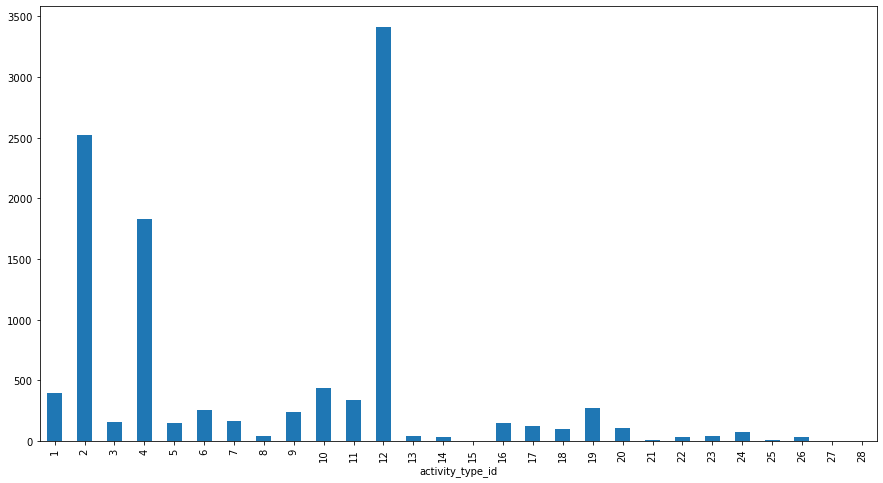

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
df.groupby(["activity_type_id"]).count()["id"].plot(kind="bar", ax=ax);
fig.savefig("../results/activity_total1.png")

In [ ]:
df.head()

,id,user_id,activity_type_id,activity_type,target_id,activity2user_id,start,finish,year-month-date-hour
0,4173,15,26,休憩,15,25397,2018-03-31 21:29:28+09:00,2018-03-31 22:02:45+09:00,2018-03-31-21.0
1,4410,15,26,休憩,15,26067,2018-04-03 21:49:23+09:00,2018-04-03 22:13:44+09:00,2018-04-03-21.0
2,6280,15,26,休憩,15,31067,2018-04-15 21:53:08+09:00,2018-04-15 22:14:46+09:00,2018-04-15-21.0
3,7928,15,26,休憩,15,34782,2018-04-21 21:34:30+09:00,2018-04-21 22:02:20+09:00,2018-04-21-21.0
4,12797,15,26,休憩,15,45514,2018-05-06 21:49:48+09:00,2018-05-06 22:08:50+09:00,2018-05-06-21.0


In [19]:
df = my_module.convert_datetime(df, ["start", "finish"])
df = my_module.add_timeLength_timeLengthSeconds(df)
df.head()

,id,user_id,activity_type_id,activity_type,target_id,activity2user_id,start,finish,year-month-date-hour,time_length,time_length_seconds
0,4173,15,26,休憩,15,25397,2018-03-31 21:29:28+09:00,2018-03-31 22:02:45+09:00,2018-03-31-21.0,0 days 00:33:17,1997.0
1,4410,15,26,休憩,15,26067,2018-04-03 21:49:23+09:00,2018-04-03 22:13:44+09:00,2018-04-03-21.0,0 days 00:24:21,1461.0
2,6280,15,26,休憩,15,31067,2018-04-15 21:53:08+09:00,2018-04-15 22:14:46+09:00,2018-04-15-21.0,0 days 00:21:38,1298.0
3,7928,15,26,休憩,15,34782,2018-04-21 21:34:30+09:00,2018-04-21 22:02:20+09:00,2018-04-21-21.0,0 days 00:27:50,1670.0
4,12797,15,26,休憩,15,45514,2018-05-06 21:49:48+09:00,2018-05-06 22:08:50+09:00,2018-05-06-21.0,0 days 00:19:02,1142.0


In [95]:
df[df["user_id"] == 25]["time_length_seconds"].value_counts().sort_index().head(27)

-85964.0     1
-85891.0     1
-85706.0     1
-85679.0     1
-85196.0     1
-85158.0     1
-84965.0     1
-84787.0     1
-84512.0     1
-83229.0     1
-83093.0     1
-82789.0     1
-82736.0     1
-81927.0     1
-80366.0     1
-79821.0     1
-79524.0     1
-79193.0     1
-79164.0     1
-77790.0     1
-74493.0     1
-10491.0     1
-1774.0      1
-1.0         1
 0.0        14
 1.0        39
 2.0         2
Name: time_length_seconds, dtype: int64